In [110]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import warnings
warnings.simplefilter(action='ignore')

In [111]:
file_name1 = 'stroke.csv'
stroke_df = pd.read_csv(file_name1)
file_name2 = 'stroke.csv'
test_df = pd.read_csv(file_name2)
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [112]:
# Display the number of records in the stroke data
len(stroke_df)

5110

In [113]:
# Display the top 5 records of stroke data
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [114]:
# check missing values in stroke data
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [115]:
# print the percentage of the missing "bmi" 
(stroke_df['bmi'].isnull().sum()/len(stroke_df))*100

3.9334637964774952

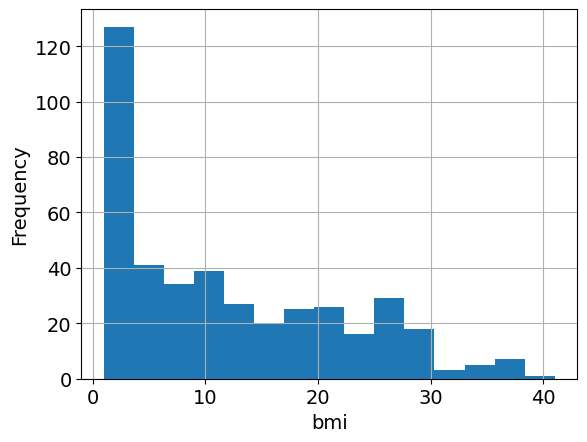

In [116]:
stroke_df['bmi'].value_counts().sort_index().plot.hist(bins = 15, rot = 0, grid = True)
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.show()

In [117]:
# print mean bmi
stroke_df['bmi'].mean()

28.893236911794666

In [118]:
# print median bmi
stroke_df['bmi'].median()

28.1

In [119]:
# print the percentage of the missing "avg_glucose_level" 
(stroke_df['avg_glucose_level'].isnull().sum()/len(stroke_df))*100

0.0

In [120]:
stroke_df['avg_glucose_level'].value_counts().idxmax()

93.88

In [121]:
# clone 
stroke_df2 = stroke_df.copy()
# Utilize the median bmi to fill in missing bmi
median2 = stroke_df['bmi'].median()
stroke_df2['bmi'].fillna(median2, inplace = True)

most = stroke_df['avg_glucose_level'].value_counts().idxmax()
stroke_df2['avg_glucose_level'].fillna(most, inplace = True)


In [122]:
stroke_df2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [123]:
stroke_df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


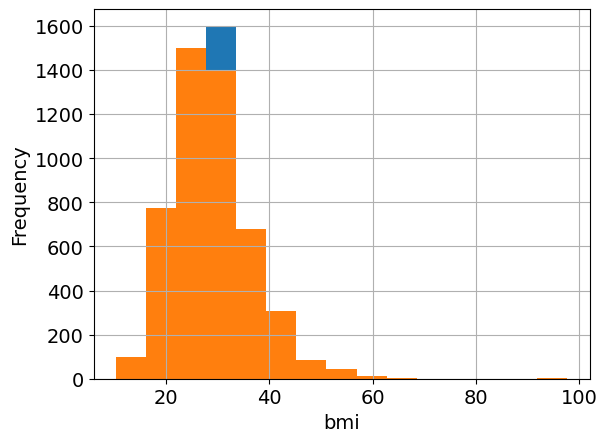

In [124]:
stroke_df2['bmi'].plot.hist(bins = 15, grid = True)
stroke_df['bmi'].plot.hist(bins = 15, grid = True)
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.show()